In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Create a figure or figures to show the different distributions of wages for white males, white females, nonwhite males, and nonwhite females in the WAGES1 dataset. 
What do you learn from the figure.

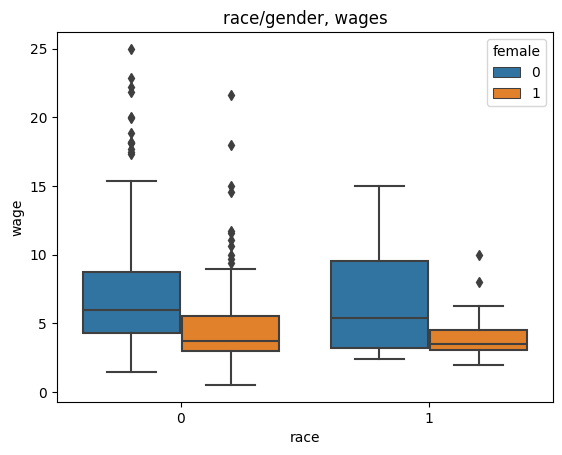

In [11]:
data = pd.read_stata('WAGE1.DTA')

sns.boxplot(
    data=data,
    x = "nonwhite",
    y = "wage",
    hue = "female"
)
plt.title('race/gender, wages')
plt.xlabel('race')
plt.ylabel('wage')
plt.show()

my main insight from these is that men in both the white and nonwhite case earn more than comparative women, and that in general men have a much wider bandwidth for log wages. additionally nowhite workers earn slightly less than their white counterparts.

Create a figure or figures to show how wage depends on education for white males, white females, nonwhite males, and nonwhite females in the WAGES1 dataset. Change the 0-1 dummy variables to more informative names so the legend will be easier to interpret. What do you learn from the figure?

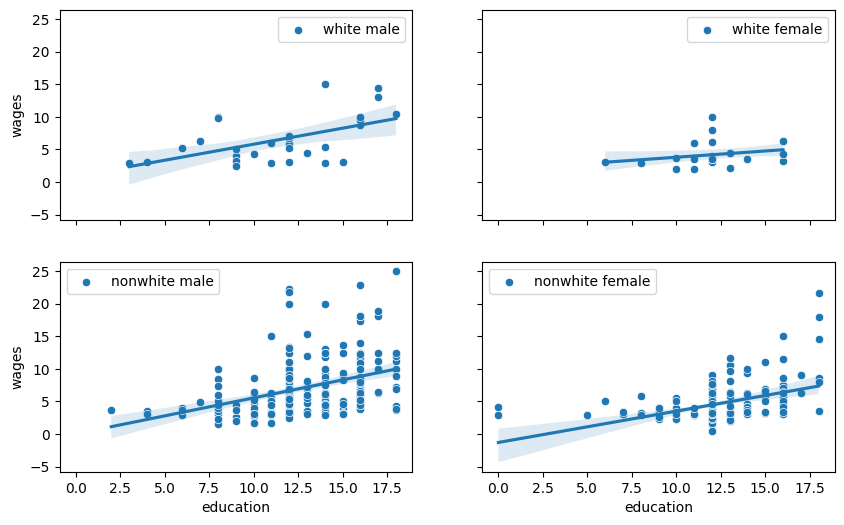

In [12]:

womenrecode = {
    0:"male",
    1:"female"

}
racerecode = {
    0:"white",
    1:"nonwhite"
}

data.sort_values(by='educ',inplace=True)
data["nonwhite"] = data["nonwhite"].replace(racerecode)
data["female"] = data["female"].replace(womenrecode)

# Create subplots for each combination of binary variables
fig, axs = plt.subplots(2, 2, figsize=(10, 6), sharex=True, sharey=True)

# Define line styles and labels
line_styles = ['-', '--', ':', '-.']
labels = ['white male', 'white female', 'nonwhite male', 'nonwhite female']

# Iterate through combinations and plot lines
for i, (bin1, bin2, style, label) in enumerate(zip(['nonwhite', 'nonwhite', 'white', 'white'], ['male', 'female', 'male', 'female'], line_styles, labels)):
    subset = data[(data['nonwhite'] == bin1) & (data['female'] == bin2)]

    ax = axs[i // 2, i % 2]
    
    # Create a scatter plot
    sns.scatterplot(x='educ', y='wage', data=subset, ax=ax, label=f'{label}')
    
    # Fit and plot a linear regression line
    sns.regplot(x='educ', y='wage', data=subset, ax=ax, scatter=False)
    
    ax.set_xlabel('education')
    ax.set_ylabel('wages')
    ax.legend()


in general these figures indicate that:
1) there's a lot more variance in education for nonwhite workers
2) white females seem to see the least return from education, wwith the other three categories seeing similar slopes, but perhaps different intercepts.

Create a pairplot of educ and wage. Use hue=“female.” Change the dummy variable to more informative names so the legend will be easier to interpret. Add regression lines to the scatterplot in a different color than the points. Create it as a lower diagonal matrix to reduce the clutter (i.e., only one scatter plot). Put educ on the x-axis of the scatter plot. What do you learn from the figure?

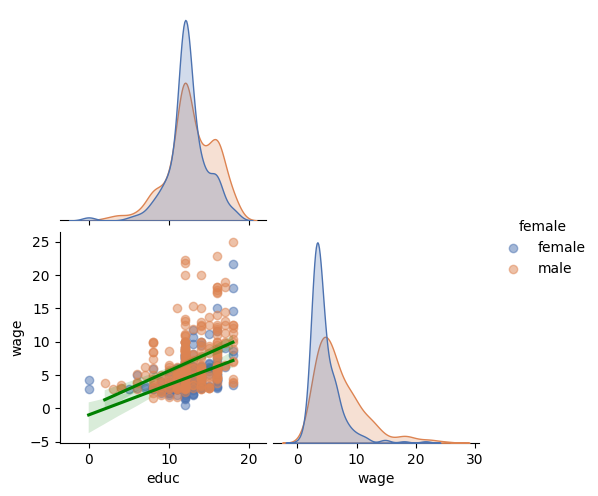

In [48]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)





pair_plot = sns.pairplot(
    data,
    vars=["educ", "wage"],
    hue="female",
    kind='reg',
    corner=True,
    diag_kws={'color': 'blue'},
    plot_kws={
        'scatter_kws': {'alpha': 0.5},
        'line_kws': {"color":"green"}
    },
    palette='deep'  # Specify colors for hue levels
)




the male distribution is skewed, i.e. men have more positive variance in their wages, and their education.

    For 3d plotting, we used code like the following:

a = np.linspace(0, 1, 11)
b = np.linspace(10, 20, 11)
A, B = np.meshgrid(a, b)

Look at A and B and explain what they are. Define

C = A + B

Create a filled contour plot with three labeled contour lines at the values C=15, C=20, and C=25.

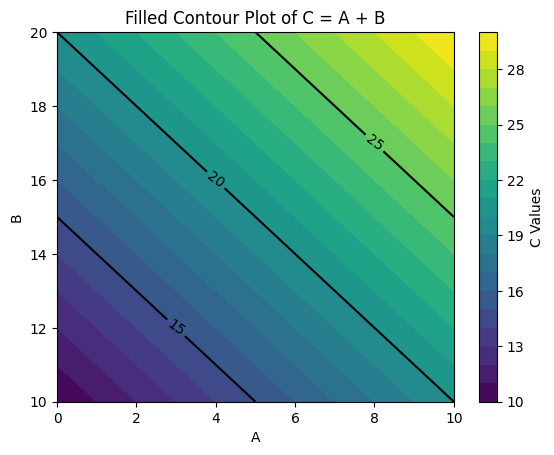

In [55]:
a = np.linspace(0, 10, 11)
b = np.linspace(10, 20, 11)
A, B = np.meshgrid(a, b)

C = A + B

C = A + B

# Create the filled contour plot with multiple contour lines
contours = plt.contourf(A, B, C, levels=range(10, 31), cmap='viridis')

# Add visible contour lines at C = 15, 20, and 25
meme = plt.contour(A, B, C, levels=[15, 20, 25], colors='black')

# Manually label contour lines at C = 15, 20, and 25 with black text
manual_labels = plt.clabel(meme, inline=True, fontsize=10, fmt='%1.0f')

# Customize the colors of the manual labels to black
for label in manual_labels:
    label.set_color('black')

# Add color bar
cbar = plt.colorbar(contours)
cbar.set_label('C Values')

# Set labels and title
plt.xlabel('A')
plt.ylabel('B')
plt.title('Filled Contour Plot of C = A + B')

# Show the plot
plt.show()





A and B are two 2d arrays, one from 0 to 10 and one from 10 to 20, with 11 evenly distributed points in their range/

The file option_sims.csv contains simulations from a model of market maker profits and stock and option order imbalances. Produce a bivariate density plot of the stock and option order imbalances. What do you learn from the figure?

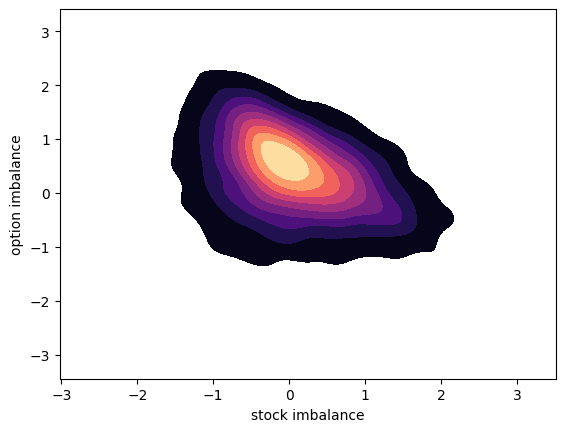

In [57]:
# Load the CSV data into a Pandas DataFrame
data = pd.read_csv('option_sims.csv')

# Create a bivariate density plot using Seaborn
sns.kdeplot(data=data, x='stock_imbalance', y='option_imbalance', cmap='magma', fill=True)

# Add labels and title
plt.xlabel('stock imbalance')
plt.ylabel('option imbalance')


# Show the plot
plt.show()

Bin the stock and option order imbalances into a 100 x 100 grid and compute the average market maker profits in each cell. Use a heatmap to show the average market maker profits as a function of the stock and option order imbalances. What do you learn from the figure?

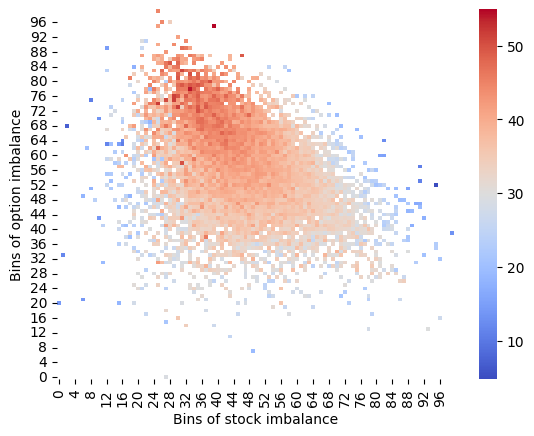

In [66]:

#what ChatGPT spat out, please ignore that I placed two versions in here
# Define the number of bins for A and B
"""num_bins = 100

# Create 2D histogram bins for A and B
hist, xedges, yedges = np.histogram2d(data['stock_imbalance'], data['option_imbalance'], bins=num_bins)

# Compute the sum of C in each bin
bin_indices_x = np.digitize(data['stock_imbalance'], xedges)
bin_indices_y = np.digitize(data['option_imbalance'], yedges)

data['bin_x'] = bin_indices_x
data['bin_y'] = bin_indices_y

# Calculate the average of C in each bin
average_c_in_bins = data.groupby(['bin_x', 'bin_y'])['mm_profits'].mean().reset_index()

# Pivot the data for creating a heatmap
heatmap_data = average_c_in_bins.pivot(index='bin_y', columns='bin_x', values='mm_profits')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".2f", cbar_kws={'label': 'Average C'})
plt.xlabel('Bins of stock_imbalance')
plt.ylabel('Bins of option_imbalance')
plt.title('Heatmap of Average MM profit vs. Binned Option imbalance and stock imbalance')
plt.gca().invert_yaxis()
plt.show()

"""

#kerry's code rewritten
from scipy.stats import binned_statistic_2d

statistic, x_edge, y_edge, binnumber = binned_statistic_2d(
    data['stock_imbalance'], data["option_imbalance"], data['mm_profits'],
    statistic='mean', 
    bins=[100, 100]
)
sns.heatmap(
    statistic.T, 
    cmap='coolwarm',
    cbar=True
)

plt.xlabel('Bins of stock imbalance')
plt.ylabel('Bins of option imbalance')
plt.gca().invert_yaxis()
plt.show()

as stock imbalance gets lower, and option imbalance increases, the market maker's profit gets higher (generally)

Create a stacked bar chart to show the different distributions of tips for males and females in the seaborn tips dataset. What do you learn from the figure?

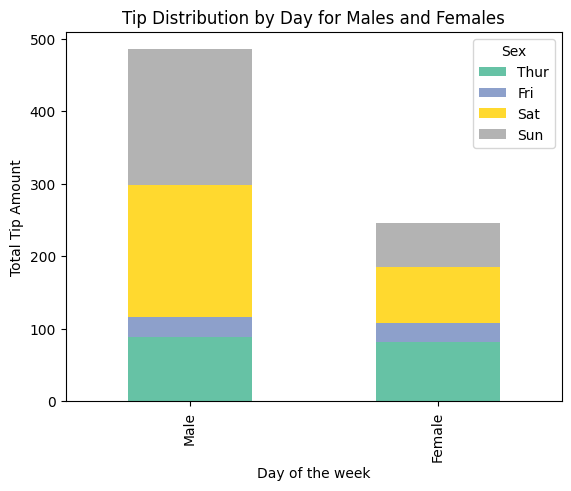

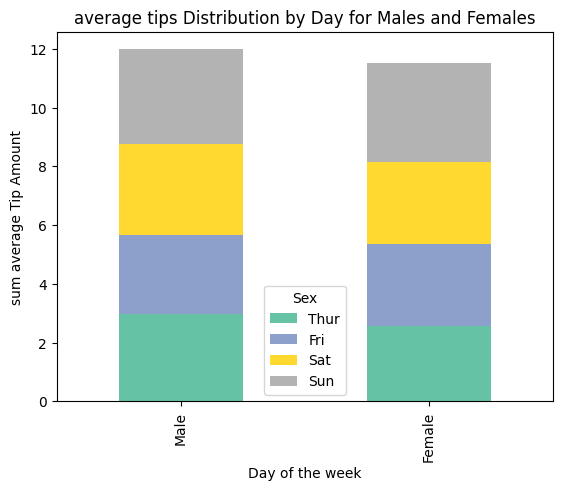

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Seaborn "tips" dataset
tips = sns.load_dataset("tips")

# Create a DataFrame with the tip distribution for males and females
tip_distribution = tips.groupby(['sex', 'day'])['tip'].sum().unstack()

# Create a stacked bar chart
tip_distribution.plot(kind='bar', stacked=True, colormap='Set2')

# Add labels and a title
plt.xlabel('Day of the week')
plt.ylabel('Total Tip Amount')
plt.title('Tip Distribution by Day for Males and Females')

# Show the plot
plt.legend(title='Sex')
plt.show()

#bonus thing:
# Create a DataFrame with the tip distribution for males and females
tip_distribution = tips.groupby(['sex', 'day'])['tip'].mean().unstack()

# Create a stacked bar chart
tip_distribution.plot(kind='bar', stacked=True, colormap='Set2')

# Add labels and a title
plt.xlabel('Day of the week')
plt.ylabel('sum average Tip Amount')
plt.title('average tips Distribution by Day for Males and Females')

# Show the plot
plt.legend(title='Sex')
plt.show()

thursdays and fridays men and women get almost the same tips, but on saturday and sunday men make a much larger amount of tips than women.